In [41]:
import geopandas as gpd
import pylab as pl
import seaborn as sns
import zipfile 
import urllib.request 
import shutil 
import os
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
def create_zillow_map(city):
    '''
    Takes the name of a city as an arguement, and pulls the file from Zillow's neighborhood website
    Returns a geopandas dataframe of the city
    '''
    
    state = cities_to_states[city]

    zillow_call = 'https://www.zillowstatic.com/static-neighborhood-boundaries/LATEST/static-neighborhood-boundaries/shp/ZillowNeighborhoods-{}.zip'.format(state)


    url = zillow_call
    file_name = '{}_shape.zip'.format(state)
    city_shp = 'ZillowNeighborhoods-{}.shp'.format(state)

    # download the file if it doesn't already exist
    if not os.path.exists(city_shp):
        # download zip from Zillow website
        with urllib.request.urlopen(url) as response, open(file_name, 'wb') as out_file:
            shutil.copyfileobj(response, out_file)
        # extract shapefile into current folder
        with zipfile.ZipFile(file_name,"r") as zip_ref:
            zip_ref.extractall()
        # remove unneeded files
        os.remove(file_name)

    data = gpd.read_file(city_shp)
    if city != 'Boston':
        data = data[data['City']==city]
    elif city == 'Boston':
        data = data[(data['City']==city) | (data['City']=='Cambridge') | (data['City']=='Newton')]
    
    return data

In [12]:
# cities to work with
cities_to_states = {'New York':'NY',
                    'Los Angeles': 'CA', 
                    'Chicago':'IL',
                    'Dallas': 'TX',
                    'Houston':'TX',
                    'Washington':'DC',
                    'Philadelphia': 'PA',
                    'Miami': 'FL',
                    'Atlanta': 'GA',
                    'Boston':'MA', 
                    'San Francisco':'CA',
                    'Detroit': 'MI',
                    'Denver': 'CO',
                    'Charlottesville': 'VA',
                    'Baltimore': 'MD',
                    'Charlotte': 'NC',
                    'Pittsburgh': 'PA',
                    'Austin': 'TX',
                    'Cleveland': 'OH',
                    'Columbus': 'OH',
                    'Portland': 'OR',
                    'New Orleans': 'LA',
                    'Salt Lake City': 'UT',
                    'Seattle':'WA'}

cities = list(cities_to_states.keys())

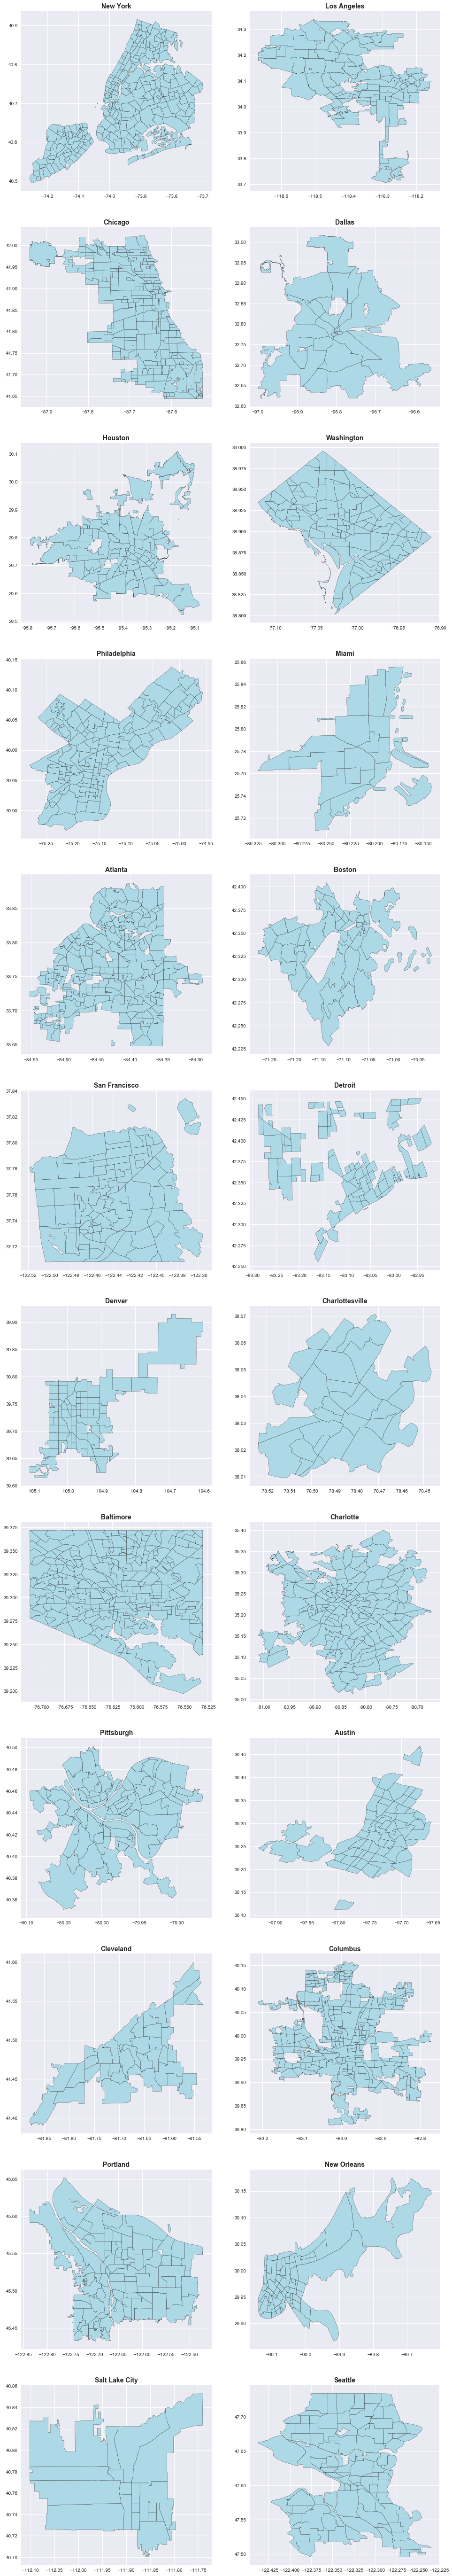

In [45]:
# print maps of all of the cities
ncols = 2
nrows = math.ceil(len(cities)/ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize = (16, 100))
for i in range(len(cities)):
    city_gdf = create_zillow_map(cities[i])
    ax = plt.subplot(nrows, ncols,i+1)
    city_gdf.plot(figsize=(8,8), color='lightblue', edgecolor='k', ax=ax, label=city)
    ax.set_title(cities[i], fontsize=14, weight='bold')